# Домашнее задание 5. Градиентный спуск

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

**Disclaimer**: 

В случае использования больших языковых моделей (large language models (LLMs), к примеру: ChatGPT, GigaChat, Qwen, etc):
- В chunk (ячейку) выше кода, созданного LLM, прикрепляйте промпт, который использовался для генерации 
- За решение с указанным промптом - _штраф 40%_ для конкретного задания, который может быть пересмотрен в сторону увеличения в следующих случаях: 
    - использован ответ LLM без указания промпта _(штраф 100%)_
    - решение избыточно и, или написано неоптимально (использование magic команд без необходимости, использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, etc) _(штраф 50%)_

Также: 
- Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.
- Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

In [2]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [3]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1:** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [147]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        l = X.shape[0] # Размер матрицы признаков
        predictions = X @ w
        mse_loss = (1 / l) * np.sum((predictions - y) ** 2)
        return mse_loss
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        l = l = X.shape[0]
        grad = (2/l)*(X.T@(X @ w - y))
        return grad

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [148]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2:** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [149]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
        w = w - lr * loss.calc_grad(X, y, w)
        w_list.append(w.copy())
    return w_list

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [150]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [151]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045026
0.8670644395649493


In [152]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])


    plt.show()

**Задание 1.3:** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

LR=0.0001


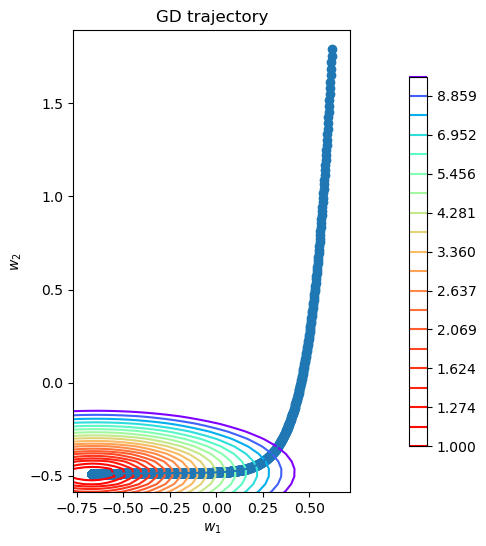

LR=0.001


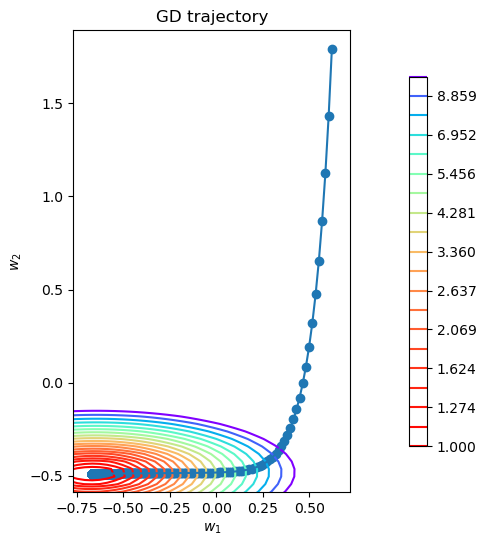

LR=0.01


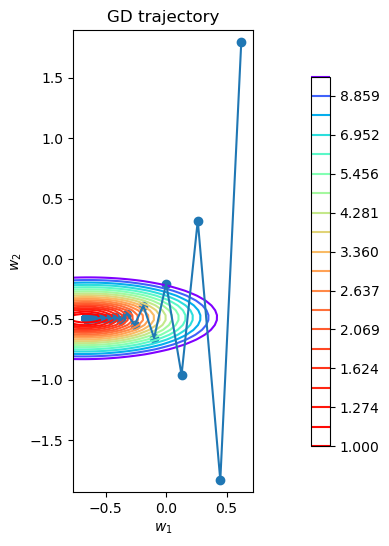

LR=0.1


/var/folders/0h/g3q8h99j4gd7vhtnq13fg3380000gn/T/ipykernel_39553/537110260.py:27: RuntimeWarning: overflow encountered in matmul
  grad = (2/l)*(X.T@(X @ w - y))
/var/folders/0h/g3q8h99j4gd7vhtnq13fg3380000gn/T/ipykernel_39553/537110260.py:27: RuntimeWarning: invalid value encountered in matmul
  grad = (2/l)*(X.T@(X @ w - y))
/var/folders/0h/g3q8h99j4gd7vhtnq13fg3380000gn/T/ipykernel_39553/3108831354.py:17: RuntimeWarning: invalid value encountered in subtract
  w = w - lr * loss.calc_grad(X, y, w)


ValueError: Axis limits cannot be NaN or Inf

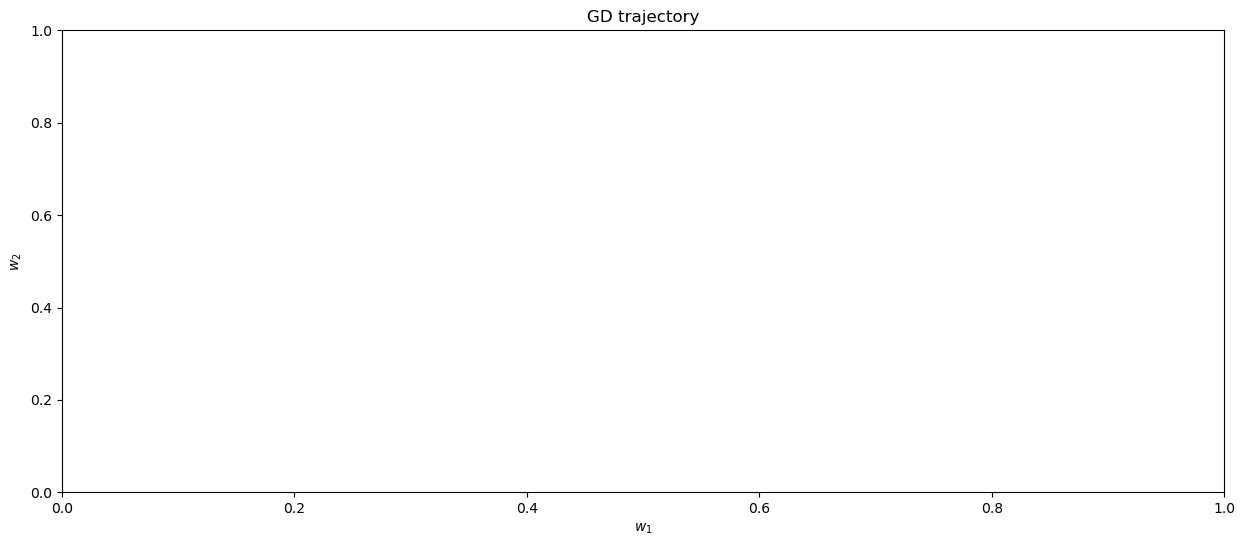

In [153]:
# -- YOUR CODE HERE --
lr_list = [0.0001, 0.001, 0.01, 0.1]
for i in lr_list:
    print(f'LR={i}')
    plot_gd(gradient_descent(w_init, X, y, loss, i), X, y, loss)

Теперь реализуем стохастический градиентный спуск

**Задание 1.4:** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [154]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = w_init.copy()
    w_list = []
    for it in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        w = w - lr * loss.calc_grad(X_batch, y_batch, w)
        w_list.append(w.copy())
    return w_list

**Задание 1.5:** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

LR=0.0001, batch_size=10


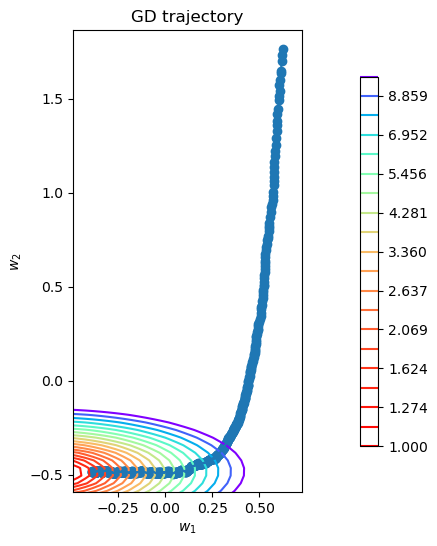

LR=0.0001, batch_size=50


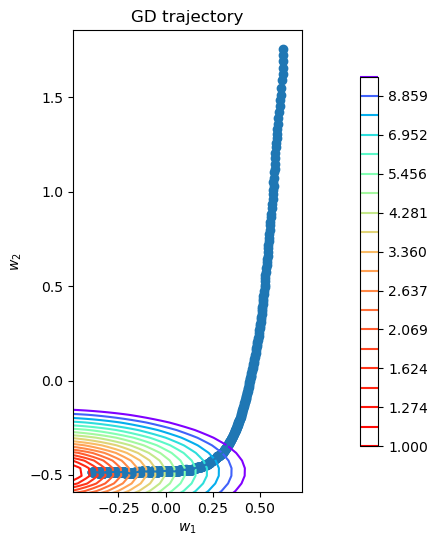

LR=0.0001, batch_size=100


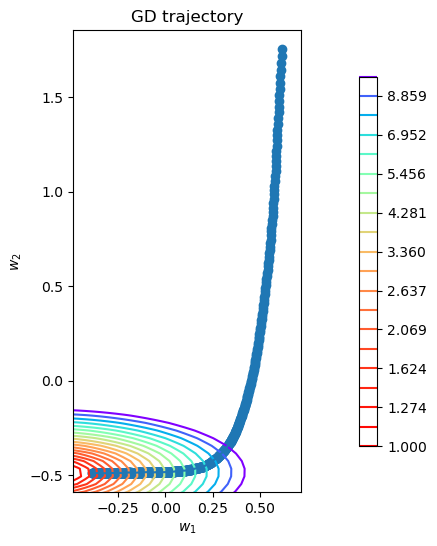

LR=0.0001, batch_size=200


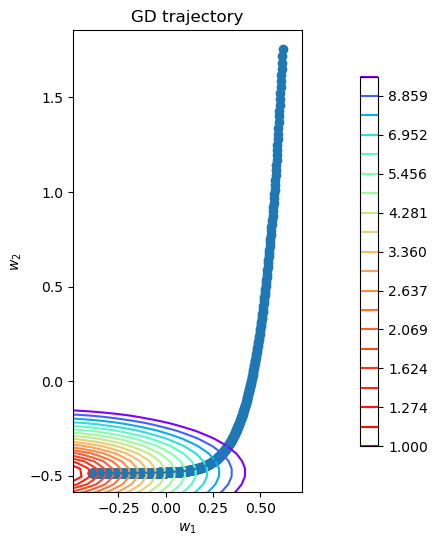

LR=0.001, batch_size=10


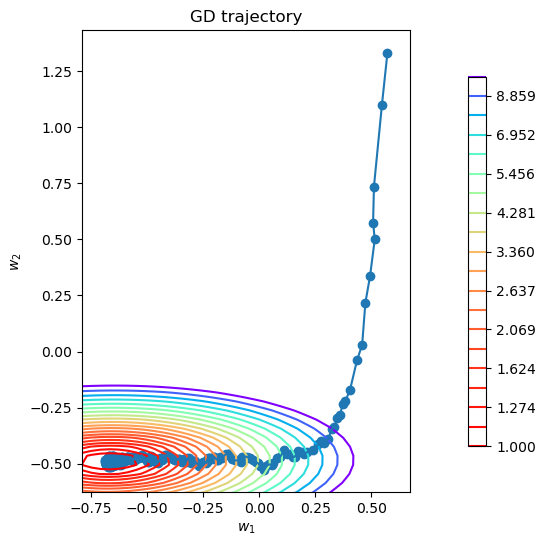

LR=0.001, batch_size=50


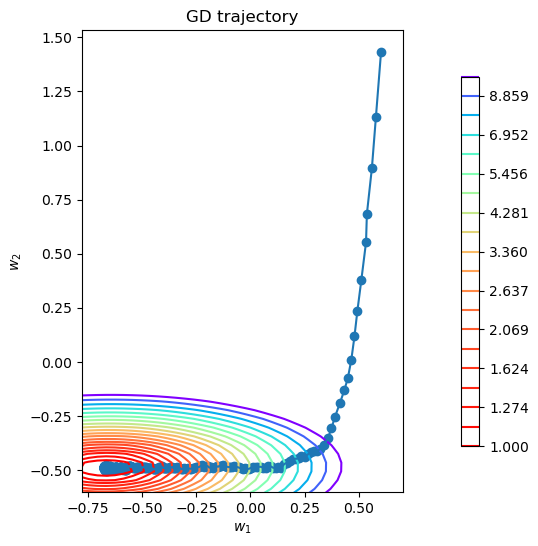

LR=0.001, batch_size=100


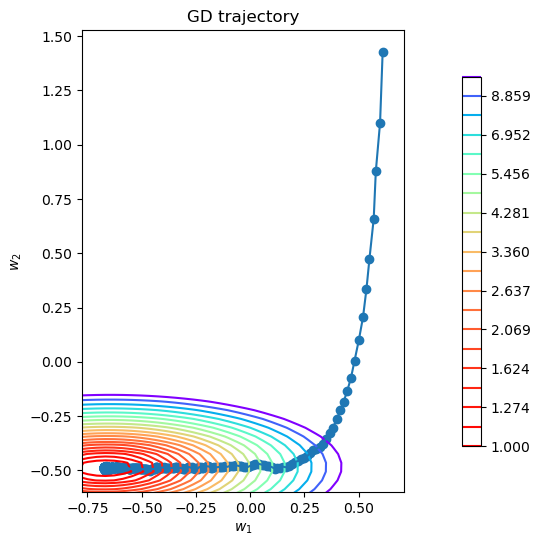

LR=0.001, batch_size=200


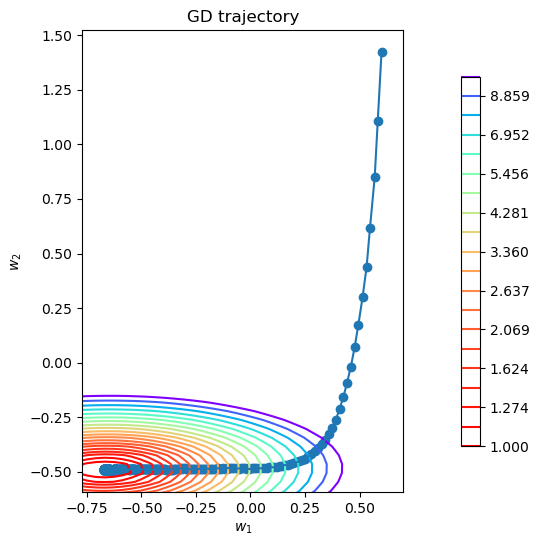

LR=0.01, batch_size=10


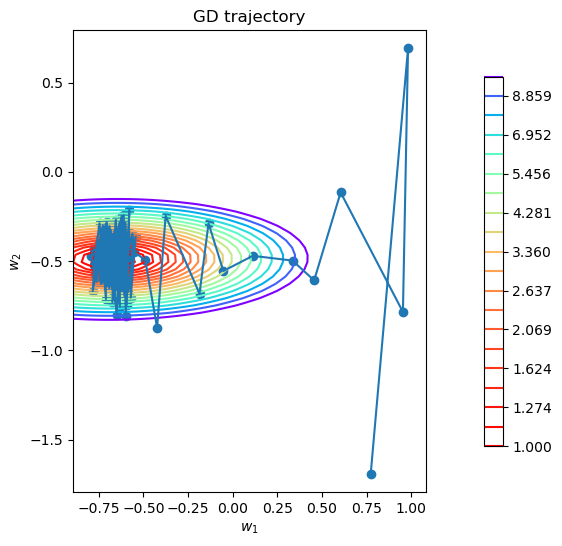

LR=0.01, batch_size=50


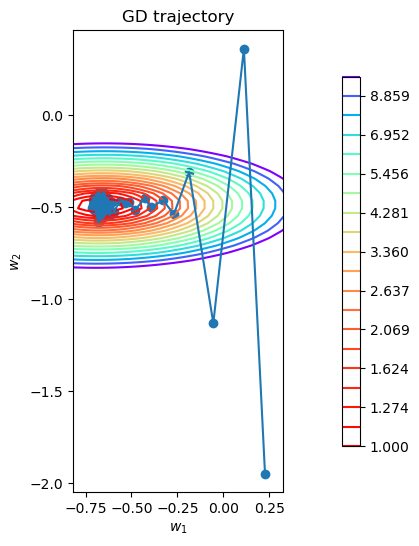

LR=0.01, batch_size=100


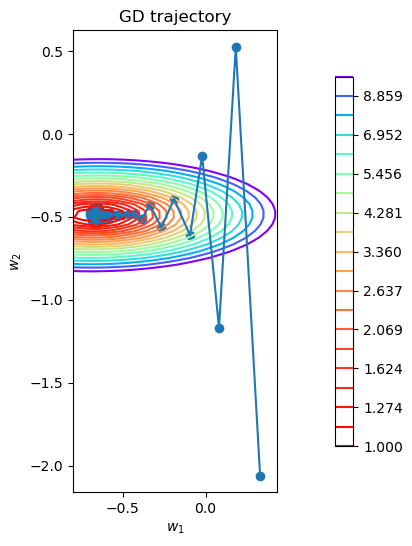

LR=0.01, batch_size=200


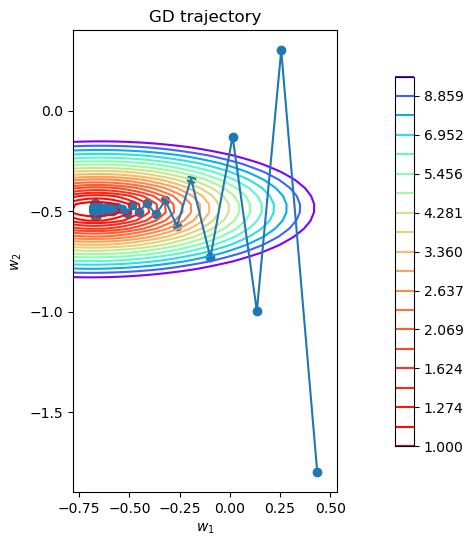

LR=0.1, batch_size=10


/var/folders/0h/g3q8h99j4gd7vhtnq13fg3380000gn/T/ipykernel_39553/537110260.py:27: RuntimeWarning: overflow encountered in matmul
  grad = (2/l)*(X.T@(X @ w - y))
/var/folders/0h/g3q8h99j4gd7vhtnq13fg3380000gn/T/ipykernel_39553/537110260.py:27: RuntimeWarning: invalid value encountered in matmul
  grad = (2/l)*(X.T@(X @ w - y))
/var/folders/0h/g3q8h99j4gd7vhtnq13fg3380000gn/T/ipykernel_39553/3410693556.py:21: RuntimeWarning: invalid value encountered in subtract
  w = w - lr * loss.calc_grad(X_batch, y_batch, w)


ValueError: Axis limits cannot be NaN or Inf

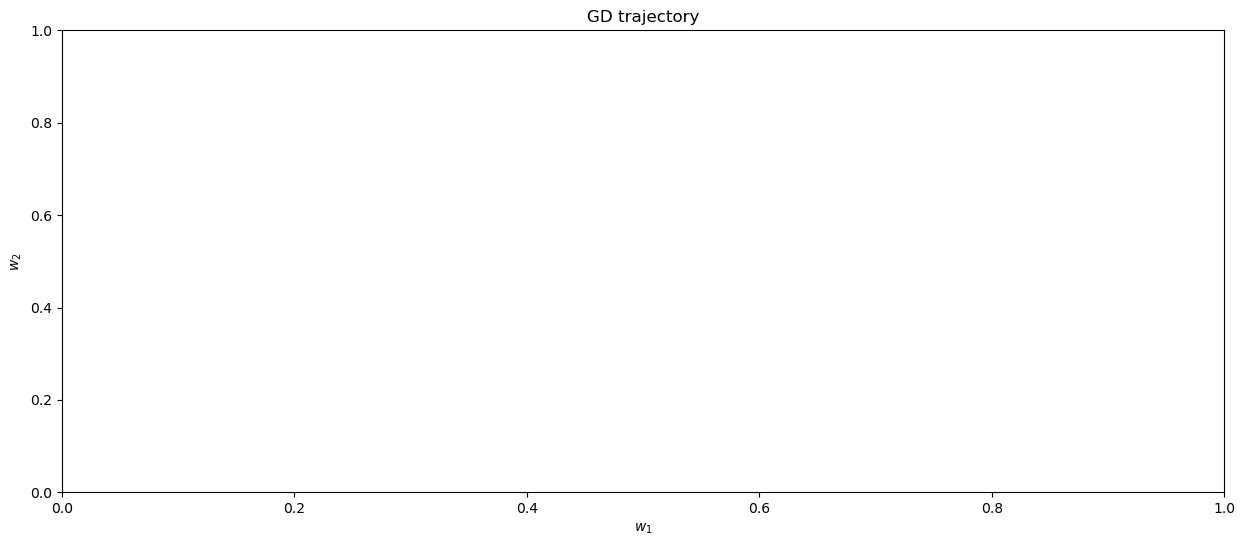

In [155]:
lr_list = [0.0001, 0.001, 0.01, 0.1]
batches = [10, 50, 100, 200]
for lr in lr_list:
    for batch in batches:
        print(f'LR={lr}, batch_size={batch}')
        plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch), X, y, loss)

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6:** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [156]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    w = w_init.copy()
    w_list = []
    for it in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        lr = lr*(1/(1+it))**p
        w = w - lr * loss.calc_grad(X_batch, y_batch, w)
        w_list.append(w.copy())
    return w_list

**Задание 1.7:** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p=0.1


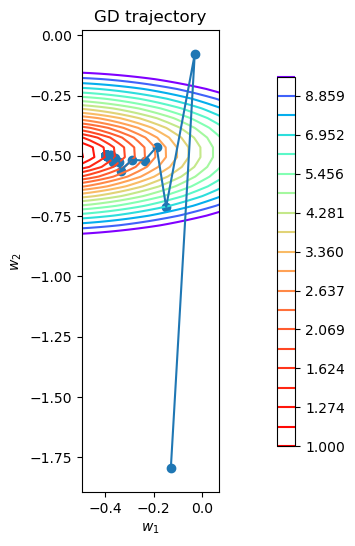

p=0.2


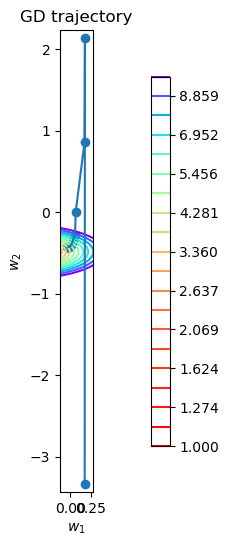

p=0.5


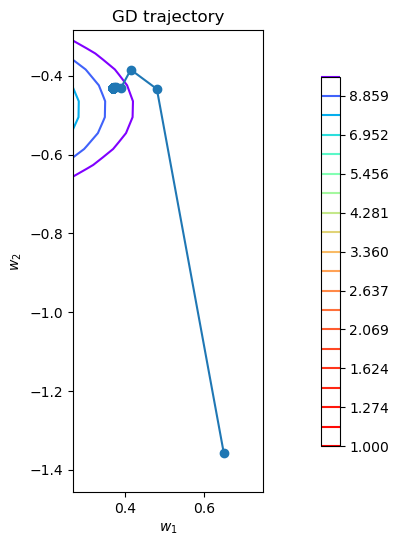

p=0.99


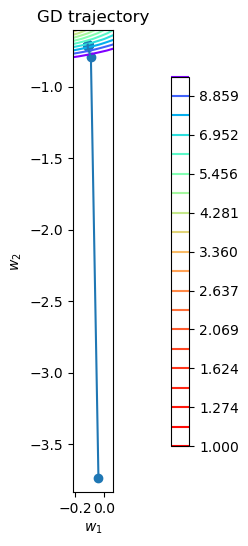

In [157]:
# -- YOUR CODE HERE --
p = [0.1, 0.2, 0.5, 0.99]
for pi in p:
    print(f'p={pi}')
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, pi), X, y, loss)

**Задание 1.8:** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

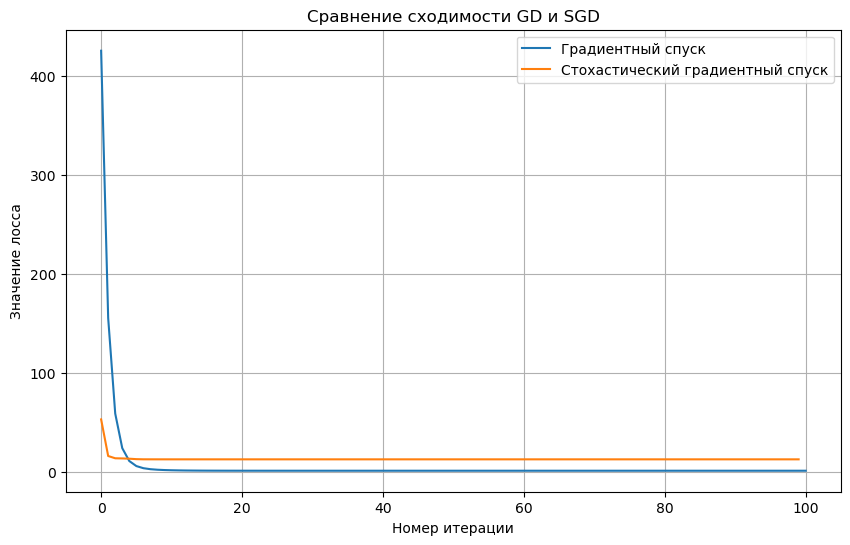

In [158]:
lr = 0.01 # Learning rate (одинаковый для обоих методов)
n_iterations = 100
batch_size = 10

# Обычный градиентный спуск
w_gd = gradient_descent(w_init, X, y, loss, lr, n_iterations)
loss_gd = [loss.calc_loss(X, y, w) for w in w_gd]

# Стохастический градиентный спуск
w_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 0.5, n_iterations)
loss_sgd = [loss.calc_loss(X, y, w) for w in w_sgd]


# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(loss_gd, label="Градиентный спуск")
plt.plot(loss_sgd, label="Стохастический градиентный спуск")
plt.xlabel("Номер итерации")
plt.ylabel("Значение лосса")
plt.title("Сравнение сходимости GD и SGD")
plt.legend()
plt.grid(True)
plt.show()

* При заданных параметрах графики градиентного и стохастического градиентного спуска получились очень близкими, но значение лосса для градиентного спуска начинается выше 400, для sgd - чуть менее 50.
* sgd вышел на плато за меньшее количество итераций чем gd, но и gd также достиг его меньше чем за 10 итераций.
* чтобы более объективно сравнить два метода необходимо поэксперементировать на данных разного размера, использовать разные гиперпараметры.

## Часть 2. Линейная регрессия

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1:** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [169]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        # -- YOUR CODE HERE --
        w_init = np.zeros(X.shape[1])
        w_list = stochastic_gradient_descent(w_init, X, y, self.loss, self.lr, batch_size=32, p=0.5)
        self.w = w_list[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака

        # -- YOUR CODE HERE --
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y_predict = X @ self.w
        return y_predict

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [17]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [115]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()
X_raw.columns = X_raw.columns.astype(str)

In [116]:
y = X_raw['25']
X_raw = X_raw.drop('25', axis=1)

**Задание 2.2:** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [45]:
# Посмотрим данные
X_raw.head()

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [46]:
# Размер датасета
X_raw.shape

(201, 26)

In [68]:
# Проверим пропуски
X_raw.isna().sum()

index     0
0         0
1        37
2         0
3         0
4         0
5         2
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        4
19        4
20        0
21        2
22        2
23        0
24        0
dtype: int64

In [48]:
# Проверим наличие ? в датасете
X_raw.isin(['?']).sum()

index    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
dtype: int64

In [117]:
# Заполним пропуски
X_raw['1'] = X_raw['1'].fillna(X_raw['1'].mean())
X_raw['5'] = X_raw['5'].fillna('unkown')
X_raw['18'] = X_raw['18'].fillna(X_raw['18'].mean())
X_raw['19'] = X_raw['19'].fillna(X_raw['19'].mean())
X_raw['21'] = X_raw['21'].fillna(X_raw['21'].mean())
X_raw['22'] = X_raw['22'].fillna(X_raw['22'].mean())

In [118]:
# Закодируем вещетвенные признаки
X_encoded = pd.get_dummies(X_raw, drop_first=True)

In [119]:
# Разделение датасета на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_encoded,
                                                                     y, 
                                                                     test_size=0.3,
                                                                     random_state=42)

In [120]:
# Масштабируем признаки
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_car_train)
test_scaled = scaler.transform(X_car_test)

# Приводим масштабированные признаки к pandas DataFrame
train_scaled_df = pd.DataFrame(train_scaled, columns=X_car_train.columns, index=X_car_train.index)

test_scaled_df = pd.DataFrame(test_scaled, columns=X_car_test.columns, index=X_car_test.index)


**Задание 2.3:** Обучите написанную вами линейную регрессию на обучающей выборке

In [170]:
# -- YOUR CODE HERE --

model = LinearRegression(MSELoss())

In [171]:
model.fit(train_scaled_df, y_car_train)

predictions_test = model.predict(X_car_test)
predictions_train = model.predict(X_car_train)

In [172]:
predictions_test

array([1712817.6969558392, 2657697.68946531, 1766119.5862740355,
       1694183.466912665, 2066152.9115633862, 1682949.409838408,
       2675868.6299357587, 1793942.5250460545, 2276113.9389577787,
       2918723.75149443, 2472966.913557976, 1710855.1344672495,
       1966591.6022936995, 1896929.9554124642, 2079785.9749878976,
       1705310.6968296915, 1918817.5710490814, 1669652.1779507638,
       1914679.9670396443, 2724883.1308218795, 2354412.743850156,
       2720773.409290809, 1630488.7467600128, 1704751.751483731,
       2586376.0314343134, 1897119.782283793, 2001117.74459808,
       2600264.134269806, 2370648.055194739, 2199752.790953911,
       2068476.1128337567, 1726235.0644841075, 2105295.5215197257,
       1750244.3090010413, 1759571.5593519977, 2204664.935210125,
       1670238.314495447, 1729770.4396947788, 1963181.8885672898,
       1854160.198010281, 2217401.7694177753, 2303425.670847816,
       2009752.1421917386, 1779600.291350818, 2201083.4084818056,
       2205559.9

In [173]:
predictions_train

array([1907339.641363316, 1690724.6059033342, 2123178.1805675933,
       1879403.5885267437, 1810215.0158207617, 1886685.829886744,
       2186940.917048842, 1735454.844184491, 1721919.8393887212,
       1694567.1010244011, 1966850.2823722756, 2003433.9166906641,
       1972471.0067500642, 1713781.8057217132, 2222271.133718268,
       1913038.4094318263, 1878632.5847743787, 2368854.1557861674,
       2349486.6109950035, 2267165.4151015608, 1987226.7261191146,
       3038425.986348655, 2236519.7765228073, 2194853.9467786932,
       1996719.4125348686, 1988813.5023111317, 1975149.6942879313,
       2246268.54854933, 1935204.512322058, 1894729.2673453484,
       1919555.403846293, 2352156.559285873, 1840399.8614222745,
       2100484.7455407926, 2291524.473140923, 1691561.1940219782,
       2294098.2418901003, 2041650.7138401498, 1980751.0315952015,
       2279538.7971448535, 1834193.105342234, 1798793.2115435223,
       1986930.496723106, 2225110.892645289, 1860344.2249298692,
       206

**Задание 2.4:** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [177]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_car_test, predictions_test)
mse_train = mean_squared_error(y_car_train, predictions_train)

print(f"MSE train: {mse_train**0.5}")
print(f"MSE test: {mse_test**0.5}")

MSE train: 2025001.363576461
MSE test: 2040917.6075996694


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5:** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [175]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        l = X.shape[0]
        predictions = X @ w
        mse_loss = (1 / l) * np.sum((predictions - y) ** 2)
        w_without_bias = w[:-1]
        l2_regularization = self.coef * np.sum(w_without_bias ** 2)
        total_loss = mse_loss + l2_regularization
        return total_loss
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        l = X.shape[0]
        predictions = X @ w
        gradient_mse = (2 / l) * (X.T @ (predictions - y))
        gradient_l2 = 2 * self.coef * np.concatenate([w[:-1], np.zeros(1)])
        total_gradient = gradient_mse + gradient_l2
        return total_gradient

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [178]:
model_2 = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6:** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [180]:
# -- YOUR CODE HERE --
model_2.fit(train_scaled_df, y_car_train)

predictions_test = model_2.predict(X_car_test)
predictions_train = model_2.predict(X_car_train)

mse_test = mean_squared_error(y_car_test, predictions_test)
mse_train = mean_squared_error(y_car_train, predictions_train)

print(f"MSE train: {mse_train**0.5}")
print(f"MSE test: {mse_test**0.5}")

MSE train: 624369.409247348
MSE test: 647143.0508510484


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7:** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [181]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        # Вычисляем предсказания
        predictions = X @ w
        
        # Вычисляем ошибки
        residuals = predictions - y
        
        # Инициализируем лосс
        loss = 0.0
        
        # Вычисляем Huber loss
        for z in residuals:
            if -self.eps < z < self.eps:
                loss += 0.5 * z ** 2
            else:
                loss += self.eps * (abs(z) - 0.5 * self.eps)
        
        # Возвращаем среднее значение лосса
        return loss / len(y)
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        # Вычисляем предсказания
        predictions = X @ w
        
        # Вычисляем ошибки
        residuals = predictions - y
        
        # Инициализируем градиент
        gradient = np.zeros_like(w)
        
        # Вычисляем градиент Huber loss
        for i in range(len(residuals)):
            z = residuals[i]
            if -self.eps < z < self.eps:
                gradient += X[i] * z / len(residuals)
            else:
                gradient += X[i] * self.eps * np.sign(z) / len(residuals)
        
        return gradient

**Задание 2.8:** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [188]:
# -- YOUR CODE HERE --

model_3 = LinearRegression(HuberLoss(3))
model_3.fit(train_scaled_df, y_car_train)

predictions_test = model_3.predict(X_car_test)
predictions_train = model_3.predict(X_car_train)

mse_test = mean_squared_error(y_car_test, predictions_test)
mse_train = mean_squared_error(y_car_train, predictions_train)

print(f"MSE train: {mse_train**0.5}")
print(f"MSE test: {mse_test**0.5}")
print()

MSE train: 14425.237660555404
MSE test: 17223.8975052836



MSELoss:

* MSE train: 2025001.363576461
* MSE test: 2040917.6075996694

HuberLoss
* MSE train: 14425.237660555404
* MSE test: 17223.8975052836

Ошибка уменьшилась в 140 раз

**Задание 3 (1 балл)**
Вставьте вашу любимую шутку, картинку 2025 в ячейку ниже:

# -- YOUR MEME HERE --
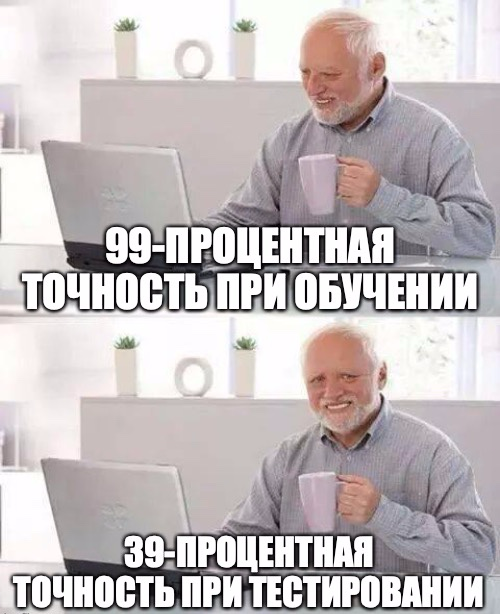

### БОНУС (25 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
# -- YOUR CODE HERE --